# Pré-processamento de dados

Neste arquivo será realizado o pré-processamento de dados, bem como filtros temporais, espaciais e visualização de dados em gráficos.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
import mne
from copy import deepcopy as dc

In [3]:
# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=256, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=256, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=256, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=256, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    print(low, high)
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data, padlen=7)

### Visualização dos gráficos com e sem filtros

... explicação (**tarefa** completar a explicação).

In [4]:
def print_graphs(X):
    for i in range(X.shape[1]):
        plt.plot(X[:,i])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(X.shape[1]):
        plt.psd(X[:,i], Fs=250)
    plt.title('Domínio da frequência')
    plt.show()

    for i in range(X.shape[1]):
        plt.specgram(X[i,:], Fs=250)
    plt.title('Espectrograma')
    plt.show()

(344127, 8)


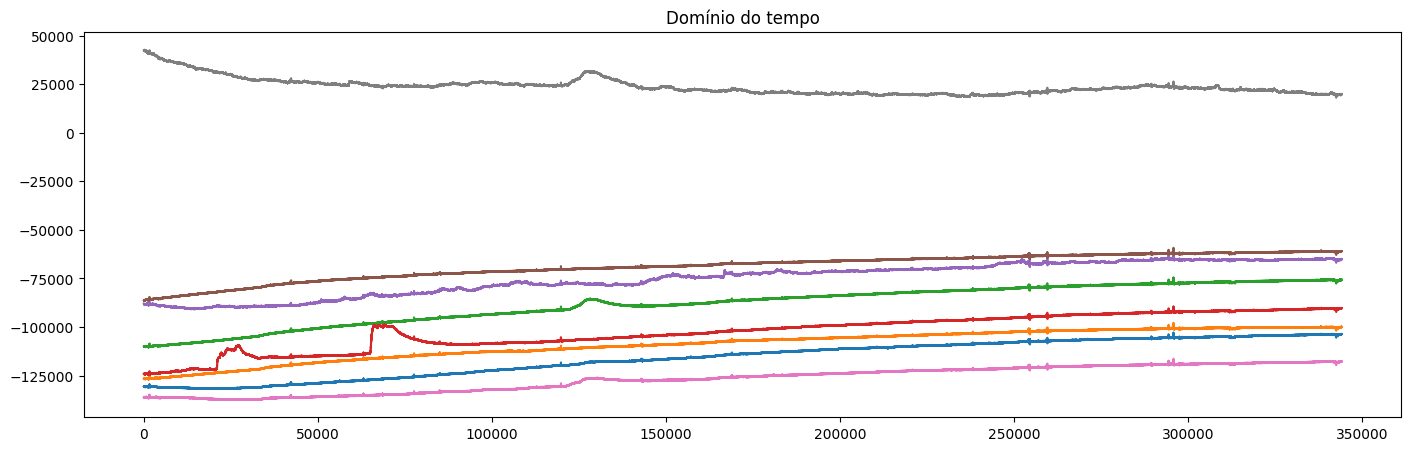

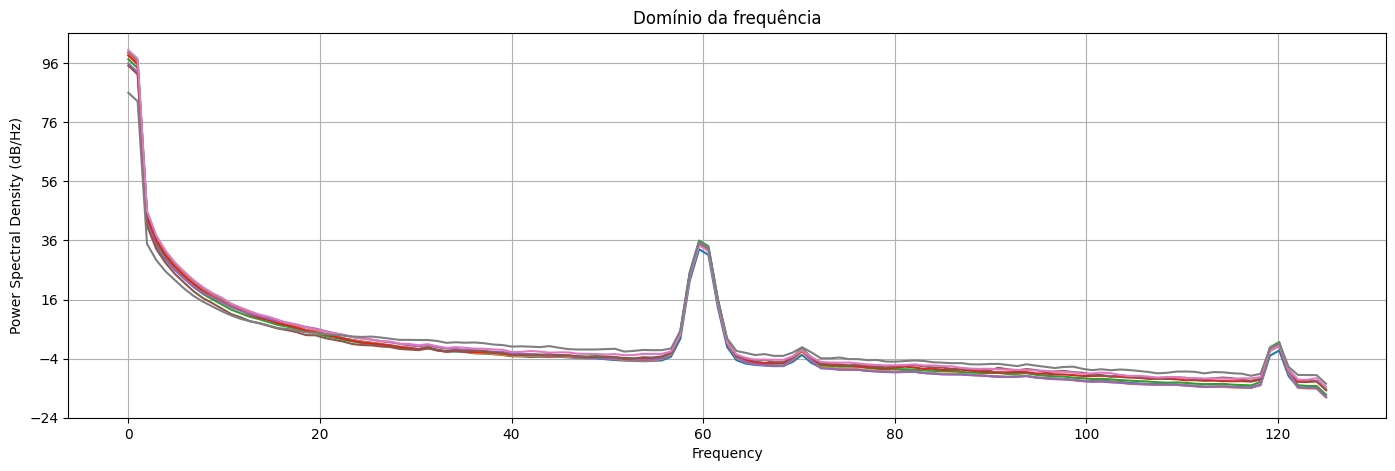

/tmp/ipykernel_569484/291471394.py:13: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=8).
  plt.specgram(X[i,:], Fs=250)


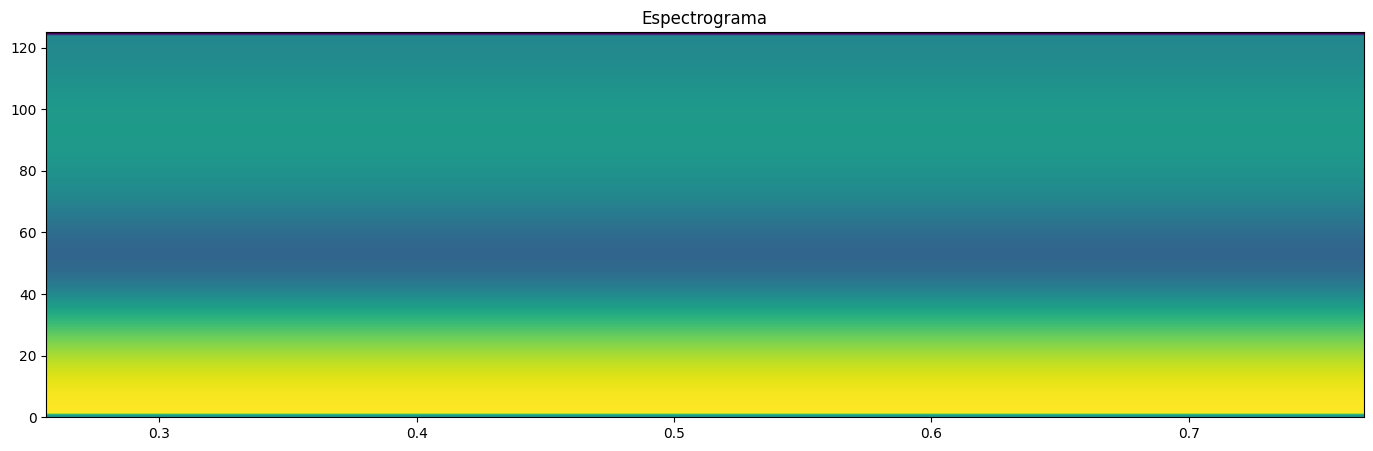

In [5]:
# Apresentação dos dados sem aplicação dos filtros.

data = np.load('../Nathalia/data.npy')
print(data.shape)

rcParams['figure.figsize'] = [17., 5.]
print_graphs(data)

### Aplicação do filtro Notch

Removendo principalmente dados de interferência da rede elétrica.

0.4609375 0.4765625


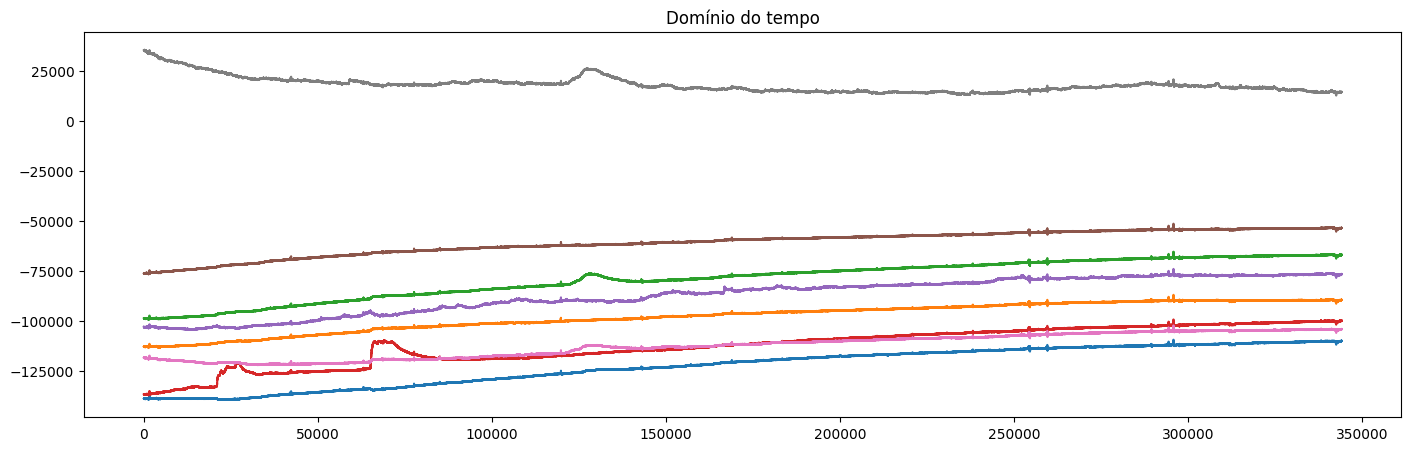

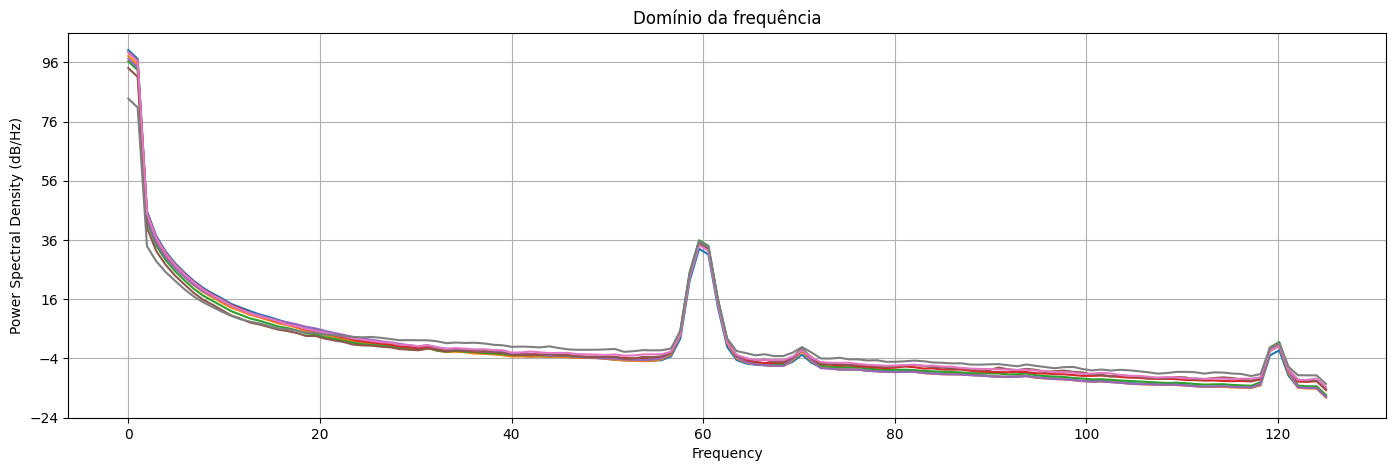

/tmp/ipykernel_569484/291471394.py:13: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=8).
  plt.specgram(X[i,:], Fs=250)


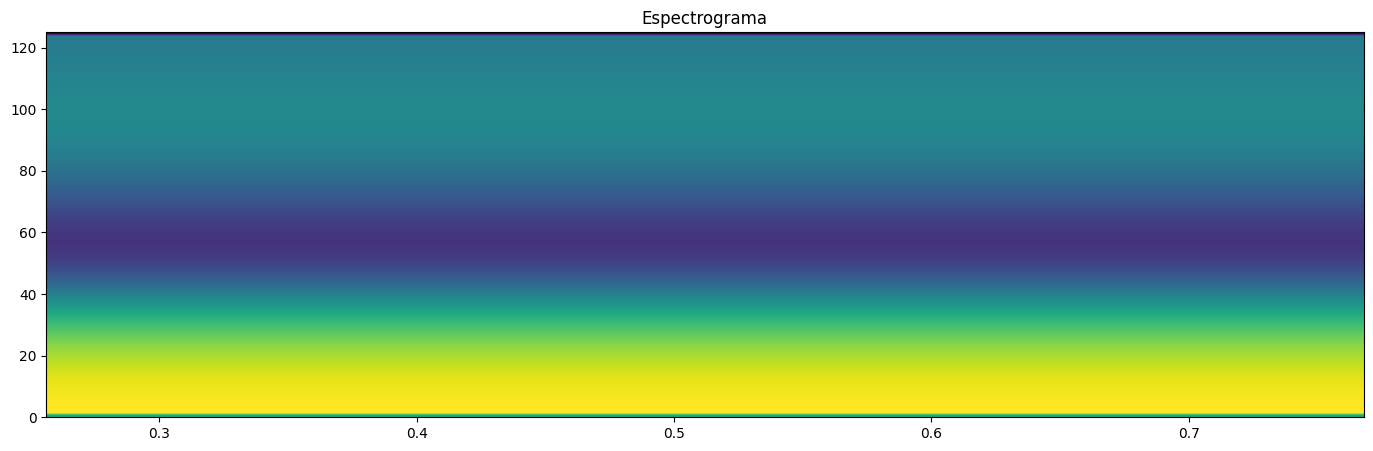

In [6]:
data_filtered = dc(data)
data_filtered = butter_notch(data_filtered, 60)
# data_filtered = data_filtered.reshape(int(data_filtered.shape[0] / 8), 8)
print_graphs(data_filtered)

**Tarefa**: Executem a mesma tarefa com os outros filtros, ajustando o tempos menores (10, 20 segundos...) para visualizar melhor os dados no domínio da frequência e as suas diferenças.

In [7]:
# teste com o objeto MNE

n_channels = 8
ch_types = ['eeg'] * n_channels
sfreq = 250
ch_names = ["Fp1", "Fp2", "F3", "F4", "T7", "T8", "P3", "P4"]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage("standard_1020")
mne_data = mne.io.RawArray(data.T, info)
mne_data

Creating RawArray with float64 data, n_channels=8, n_times=344127
    Range : 0 ... 344126 =      0.000 ...  1376.504 secs
Ready.


<RawArray | 8 x 344127 (1376.5 s), ~21.0 MB, data loaded>

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/skyron/Documents/tutoriais/.conda/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


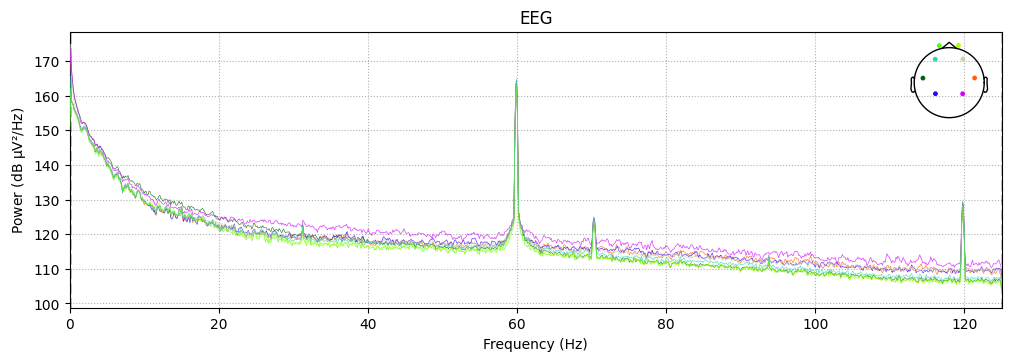

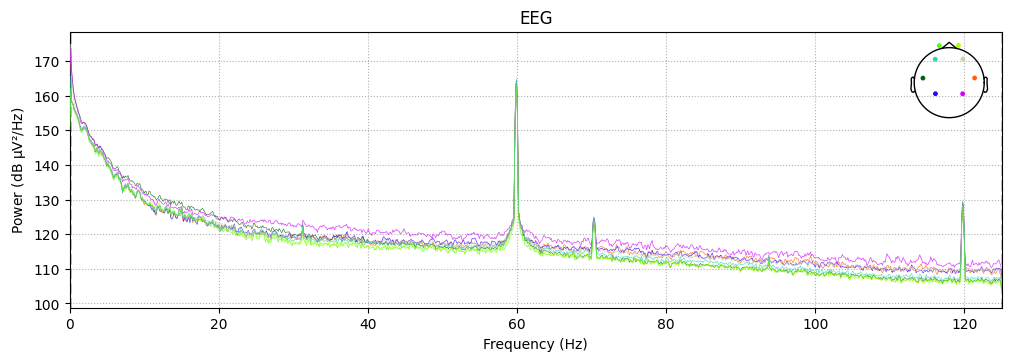

In [8]:
mne_data.compute_psd().plot()

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 413 samples (1.652 s)

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/skyron/Documents/tutoriais/.conda/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


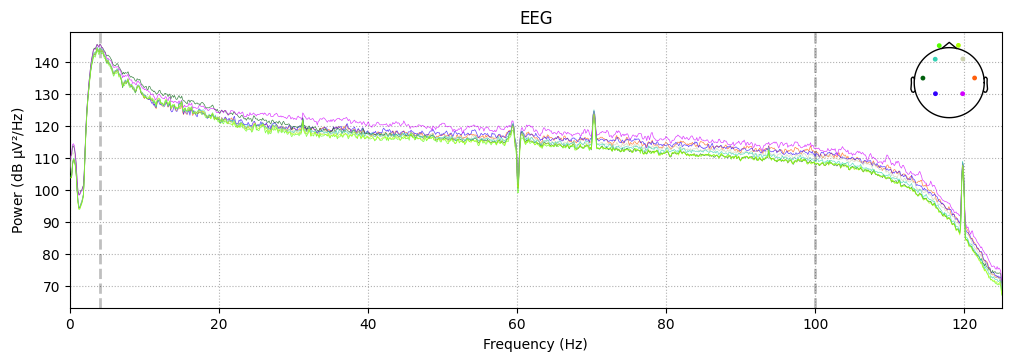

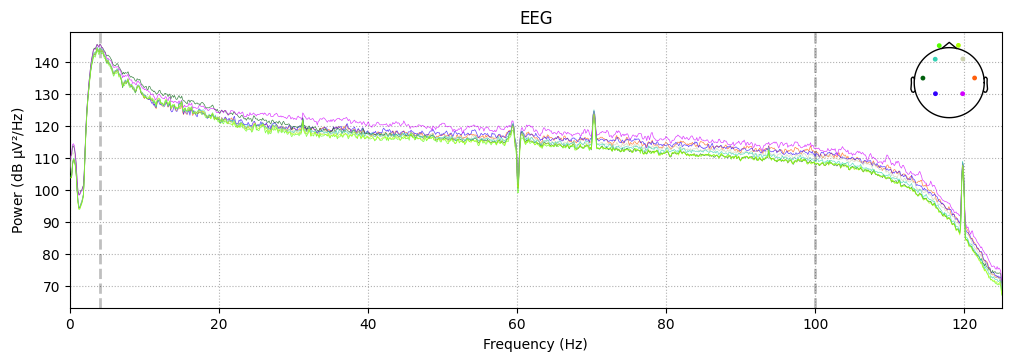

In [9]:
mne_data_filtered = mne_data.copy()
mne_data_filtered = mne_data_filtered.notch_filter(freqs=60)
mne_data_filtered = mne_data_filtered.filter(l_freq=4, h_freq=100)
mne_data_filtered.compute_psd().plot()

In [10]:
mne_data_filtered.save('../Nathalia/data_filtered.fif', overwrite=True)

Writing /home/skyron/Documents/tutoriais/Focus/src/../Nathalia/data_filtered.fif
Closing /home/skyron/Documents/tutoriais/Focus/src/../Nathalia/data_filtered.fif
[done]


/tmp/ipykernel_569484/1048096311.py:1: RuntimeWarning: This filename (/home/skyron/Documents/tutoriais/Focus/src/../Nathalia/data_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data_filtered.save('../Nathalia/data_filtered.fif', overwrite=True)


**Tarefa 1**: Existem parâmetros e métodos no objeto MNE, que permitem obtem janelas específicas de tempo. Utilize destas ferramentas para capturar pedaços específicos do sinal no domínio do tempo que possa ter a evocação do ritmo Beta (Utilizar o OpenBCI GUI para analisar as fatias de tempo).

**Tarefa 2**: Trabalhar em cima dos dados no domínio da frequência! Observar (para a janela de dados que possui ritmo Beta evocado por exemplo) os valores absolutos de energia (PSD). Analisar se realmente os valores que compreendem o ritmo beta está acima dos outros valores, etc. Reportar as conclusões obtidas.